# Collinearity problem
## In this workthrough, I will be focusing on **investigating the problem of collinearity in a regression model**. This will be demonstrated by creating a linear model in which y is a function of x1 and x2.
### Collinearity is a high correlation or linear dependency between two or more predictors in the dataset. This can cause problems such as unstable coefficient estimates, interpretation problems, inflated standard errors and cause a reduction in the model's performance thus reducing its predictive powers.
### **1. Importing libraries and creating simulated data**

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [4]:
# Generating random numbers for x1 and x2
np.random.seed(5)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100) # creating y as a function of x1 and x2

# Converting variables into a dataframe
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
df.head()


,y,x1,x2
0,3.975807,0.221993,0.293133
1,4.302220,0.870732,0.392663
2,2.877210,0.206719,-0.013111
3,4.034446,0.918611,0.319598
4,3.016912,0.488411,0.331471


### **2. Correlation and visualization**
### Next we will investigate the correlation between our two predictors x1 and x2

In [17]:
# Initiating a correlation matrix
df.corr()

,y,x1,x2
y,1.000000,0.662657,0.583263
x1,0.662657,1.000000,0.819369
x2,0.583263,0.819369,1.000000


### We observe a very high correlation score of 81.93% between the two predictors. A high correlation between predictors is a clue for collinearity. For the purpose of this workthrough, a high correlation is what we need to demonstrate the effect of collinearity in a dataset.
### Below is a visual representation of the predictors using a regression plot (Scatterplot with a regression line).

<Axes: xlabel='x1', ylabel='x2'>

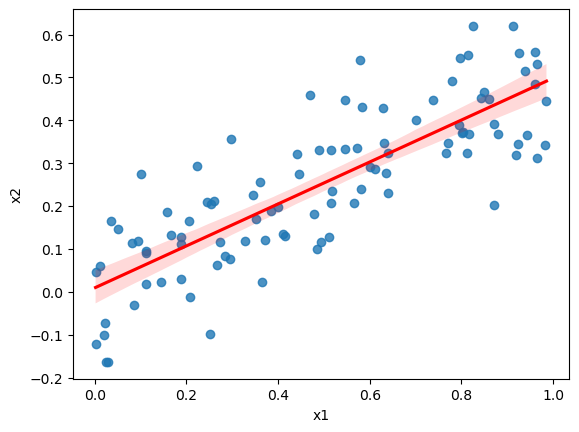

In [26]:
sns.regplot(data= df, x= 'x1', y= 'x2', line_kws= {'color':'red'})

### **3. Fitting a linear regression model**
### First I will use all predictors to create a model that predicts y, then use both predictors individually and comment on the results observed from all the models

In [29]:
# Full model
predictors = df.columns.drop(['y'])
X = MS(predictors).fit_transform(df)
y = df['y']

model = sm.OLS(y, X)
rslt = model.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.74
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.31e-13
Time:                        15:56:56   Log-Likelihood:                -123.67
No. Observations:                 100   AIC:                             253.3
Df Residuals:                      97   BIC:                             261.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8158      0.162     11.231      0.000       1.495       2.137
x1             2.0758      0.488      4.257      0.000       1.108       3.044
x2             0.7584      0.817      0.929      0.355      -0.862       2.379
==============================================================================
Omnibus:                        0.718   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.574
Skew:                          -0.185   Prob(JB):                        0.750
Kurtosis:                       2.981   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intially when creating y as a function of x1 and x2, we had a constant of 2, x1 coefficient of 2 and x2 coefficient of 0.3. Our model has provided accurate estimates of the coefficients producing values of 1.81, 2.07 and 0.75 respectively with x2 being significantly different.
### Based on the results of the model, we can reject the null hypothesis (which states that the coefficients of the predictors are 0) using the t-statistic and p-value. A high t-statistic leads to a low p-value vice versa.
### In this case we reject the null hypotheses for x1 and not for x2. That is to say that x2 is not statistically significant in predicting y (x2 has a very low t-statistic and a p-value above 0.05).
### Next we will predict y with only x1.

In [32]:
X = MS(['x1']).fit_transform(df)
y = df['y']

model = sm.OLS(y, X)
rslt = model.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.72
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.93e-14
Time:                        16:09:08   Log-Likelihood:                -124.11
No. Observations:                 100   AIC:                             252.2
Df Residuals:                      98   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8229      0.161     11.295      0.000       1.503       2.143
x1             2.4468      0.279      8.759      0.000       1.892       3.001
==============================================================================
Omnibus:                        0.357   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.272
Skew:                          -0.127   Prob(JB):                        0.873
Kurtosis:                       2.963   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As expected from our full model, we can reject the null hypothesis for x1 using the t-statistic and p-value. We can also note an increase in the coefficient of x1.
### Next we will only use x2 as the predictor.

In [33]:
X = MS(['x2']).fit_transform(df)
y = df['y']

model = sm.OLS(y, X)
rslt = model.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     50.53
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.92e-10
Time:                        16:09:34   Log-Likelihood:                -132.23
No. Observations:                 100   AIC:                             268.5
Df Residuals:                      98   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1250      0.157     13.572      0.000       1.814       2.436
x2             3.6070      0.507      7.108      0.000       2.600       4.614
==============================================================================
Omnibus:                        1.537   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.597
Skew:                          -0.272   Prob(JB):                        0.450
Kurtosis:                       2.704   Cond. No.                         5.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In this case we can reject the null hypothesis for x2 as well (higher t-statistic and p-value below 0.05), which is contradictory to what we would expect using the fuller model. Its also interesting to see how the coefficient for x2 has increased even beyond the coefficient of x1.
### This is the case and impact of collinearity in the dataset. Individually both predictors are statistically relevent in predicting y but when both predictors are added to the model one of the variables loses its predictive powers since the variance it explains has already been accounted for by the other predictor. 
### In the case of this model you will have better accuracy by only using one of the predictors instead of both.